In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn folium


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/modis_2020_India.csv')
df2 = pd.read_csv('/content/drive/MyDrive/modis_2021_India.csv')
df3 = pd.read_csv('/content/drive/MyDrive/modis_2022_India 2.csv')  # Keep as is if the name is correct


In [ ]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.1282,96.9943,301.4,1.7,1.3,2020-01-01,357,Terra,MODIS,40,6.03,278.8,15.3,D,0
1,33.1827,74.0774,301.5,1.5,1.2,2020-01-01,534,Terra,MODIS,48,6.03,280.6,12.3,D,0
2,30.0068,80.6242,300.6,1.1,1.1,2020-01-01,535,Terra,MODIS,38,6.03,278.7,9.1,D,0
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0
4,30.1529,80.2387,301.9,1.1,1.0,2020-01-01,535,Terra,MODIS,41,6.03,274.5,7.3,D,0


In [ ]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [ ]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.1282,96.9943,301.4,1.7,1.3,2020-01-01,357,Terra,MODIS,40,6.03,278.8,15.3,D,0
1,33.1827,74.0774,301.5,1.5,1.2,2020-01-01,534,Terra,MODIS,48,6.03,280.6,12.3,D,0
2,30.0068,80.6242,300.6,1.1,1.1,2020-01-01,535,Terra,MODIS,38,6.03,278.7,9.1,D,0
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0
4,30.1529,80.2387,301.9,1.1,1.0,2020-01-01,535,Terra,MODIS,41,6.03,274.5,7.3,D,0


In [ ]:
df.shape

(268813, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268813 entries, 0 to 268812
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    268813 non-null  float64
 1   longitude   268813 non-null  float64
 2   brightness  268813 non-null  float64
 3   scan        268813 non-null  float64
 4   track       268813 non-null  float64
 5   acq_date    268813 non-null  object 
 6   acq_time    268813 non-null  int64  
 7   satellite   268813 non-null  object 
 8   instrument  268813 non-null  object 
 9   confidence  268813 non-null  int64  
 10  version     268813 non-null  float64
 11  bright_t31  268813 non-null  float64
 12  frp         268813 non-null  float64
 13  daynight    268813 non-null  object 
 14  type        268813 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 30.8+ MB


In [ ]:
df.isnull()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268809,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268811,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
latitude,0
longitude,0
brightness,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,268813.0,24.458636,4.864815e+00,8.1072,21.4592,24.2547,29.5499,34.9734
longitude,268813.0,81.102506,6.683031e+00,68.4526,75.7023,78.8165,84.6254,97.1033
brightness,268813.0,324.088980,1.454114e+01,300.0000,314.7000,322.0000,331.3000,505.7000
scan,268813.0,1.420356,6.374145e-01,1.0000,1.0000,1.2000,1.5000,4.8000
track,268813.0,1.151785,2.034631e-01,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,268813.0,821.670671,3.495800e+02,325.0000,644.0000,753.0000,821.0000,2150.0000
confidence,268813.0,64.359908,1.834998e+01,0.0000,54.0000,66.0000,76.0000,100.0000
version,268813.0,6.030000,2.324634e-11,6.0300,6.0300,6.0300,6.0300,6.0300
bright_t31,268813.0,303.449820,8.278704e+00,267.0000,298.4000,302.4000,308.8000,400.1000
frp,268813.0,28.169586,7.986718e+01,0.0000,8.8000,13.8000,25.2000,6961.8000


In [ ]:
df.type.value_counts()

,count
type,
0,255694
2,13072
3,47


In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique Values: ['2020-01-01' '2020-01-02' '2020-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']
Number of Unique Values: 1090
--------------------------------------------------
Column: satellite
Unique Values: ['Terra' 'Aqua']
Number of Unique Values: 2
--------------------------------------------------
Column: instrument
Unique Values: ['MODIS']
Number of Unique Values: 1
--------------------------------------------------
Column: daynight
Unique Values: ['D' 'N']
Number of Unique Values: 2
--------------------------------------------------


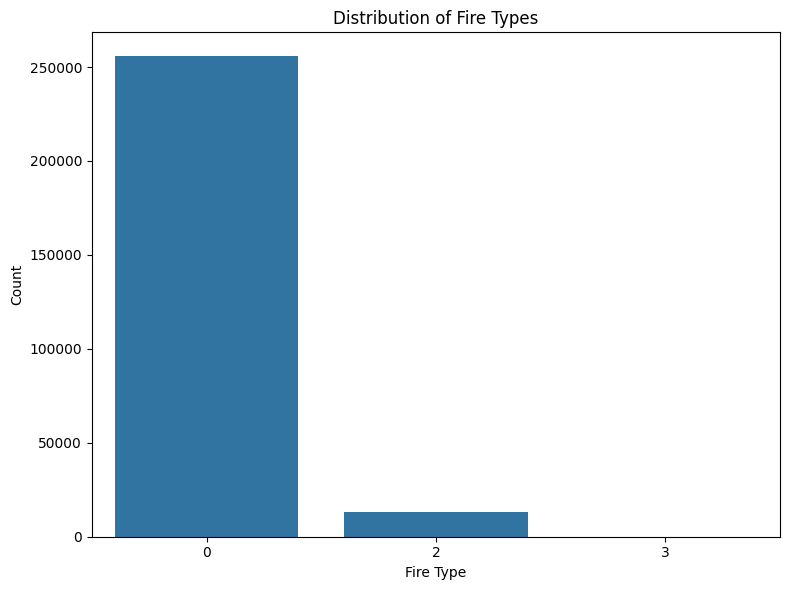

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


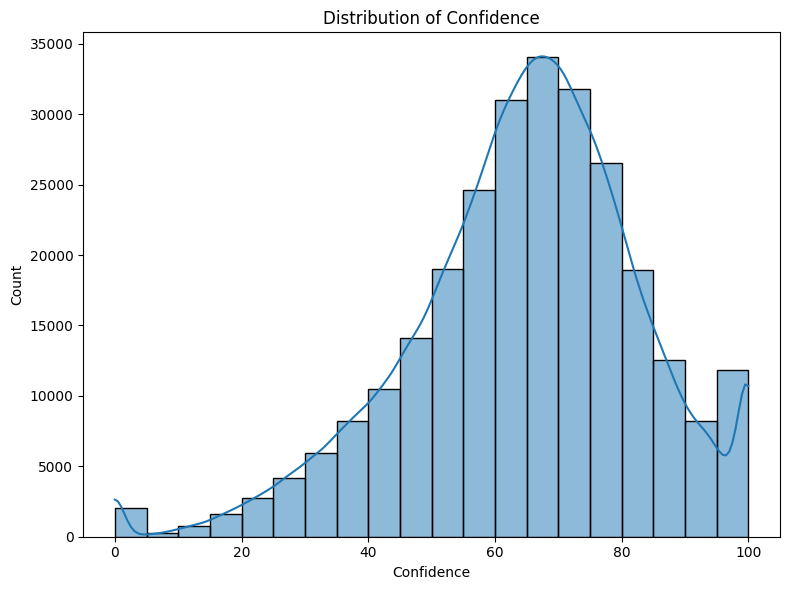

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'],bins=20,kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

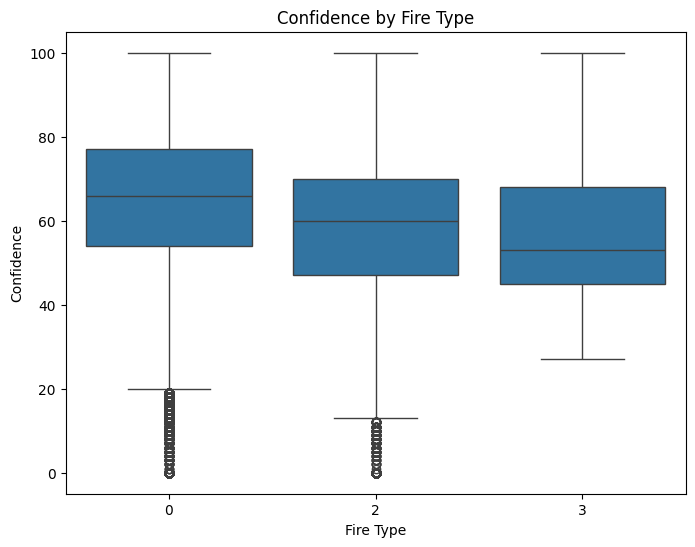

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type',y='confidence',data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

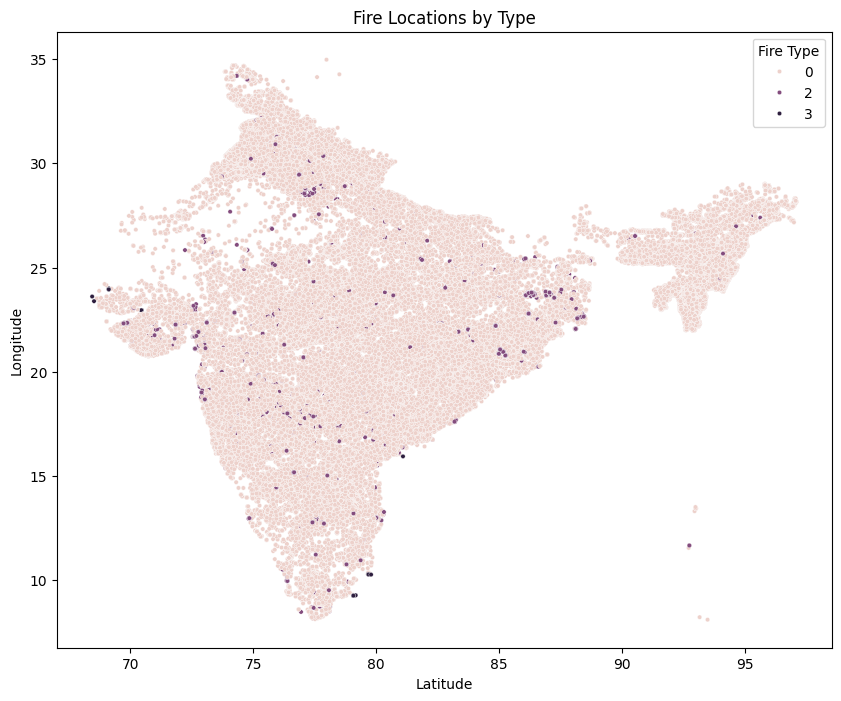

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude',y='latitude',hue='type',data=df,s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Fire Type')
plt.show()

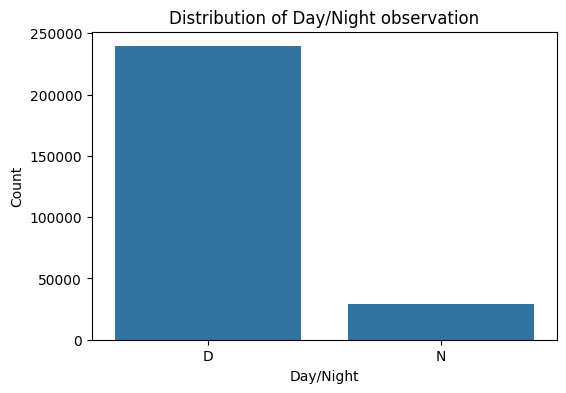

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight',data=df)
plt.title('Distribution of Day/Night observation')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

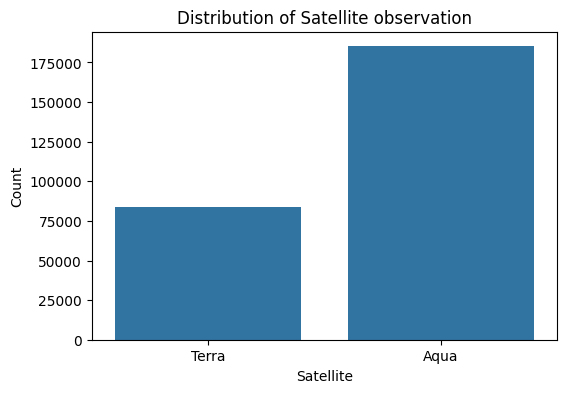

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='satellite',data=df)
plt.title('Distribution of Satellite observation')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

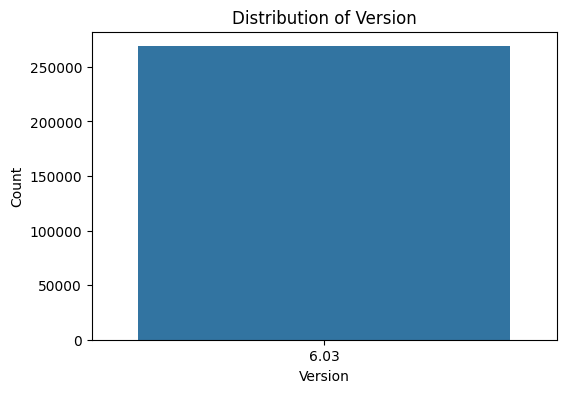

In [ ]:
#count plot for versions
plt.figure(figsize=(6,4))
sns.countplot(x='version',data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

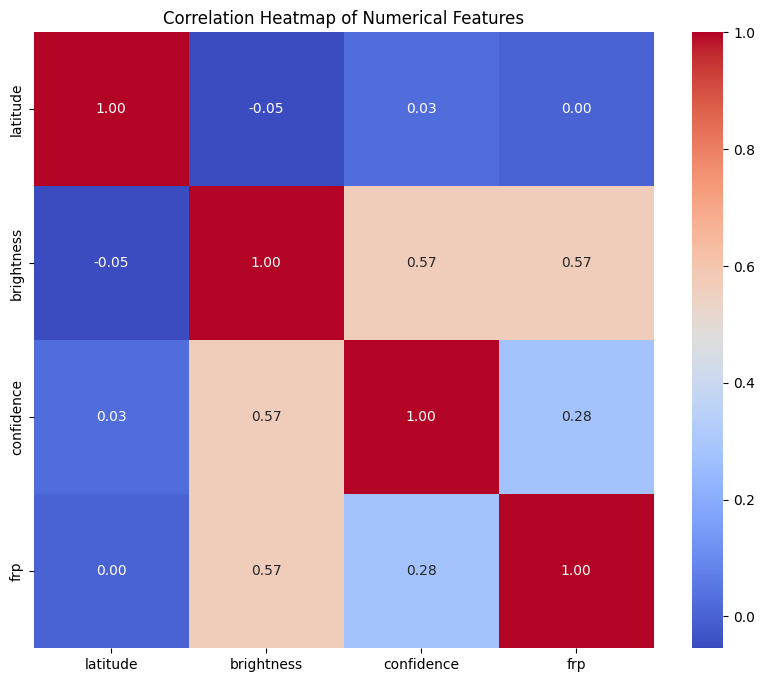

In [ ]:
#heatmap of correaltion between numerical features
plt.figure(figsize=(10,8))
correlation_matrix=df[['latitude','brightness','confidence','frp']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
numericals_cols =df.select_dtypes(include=np.number).columns

In [ ]:
numericals_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

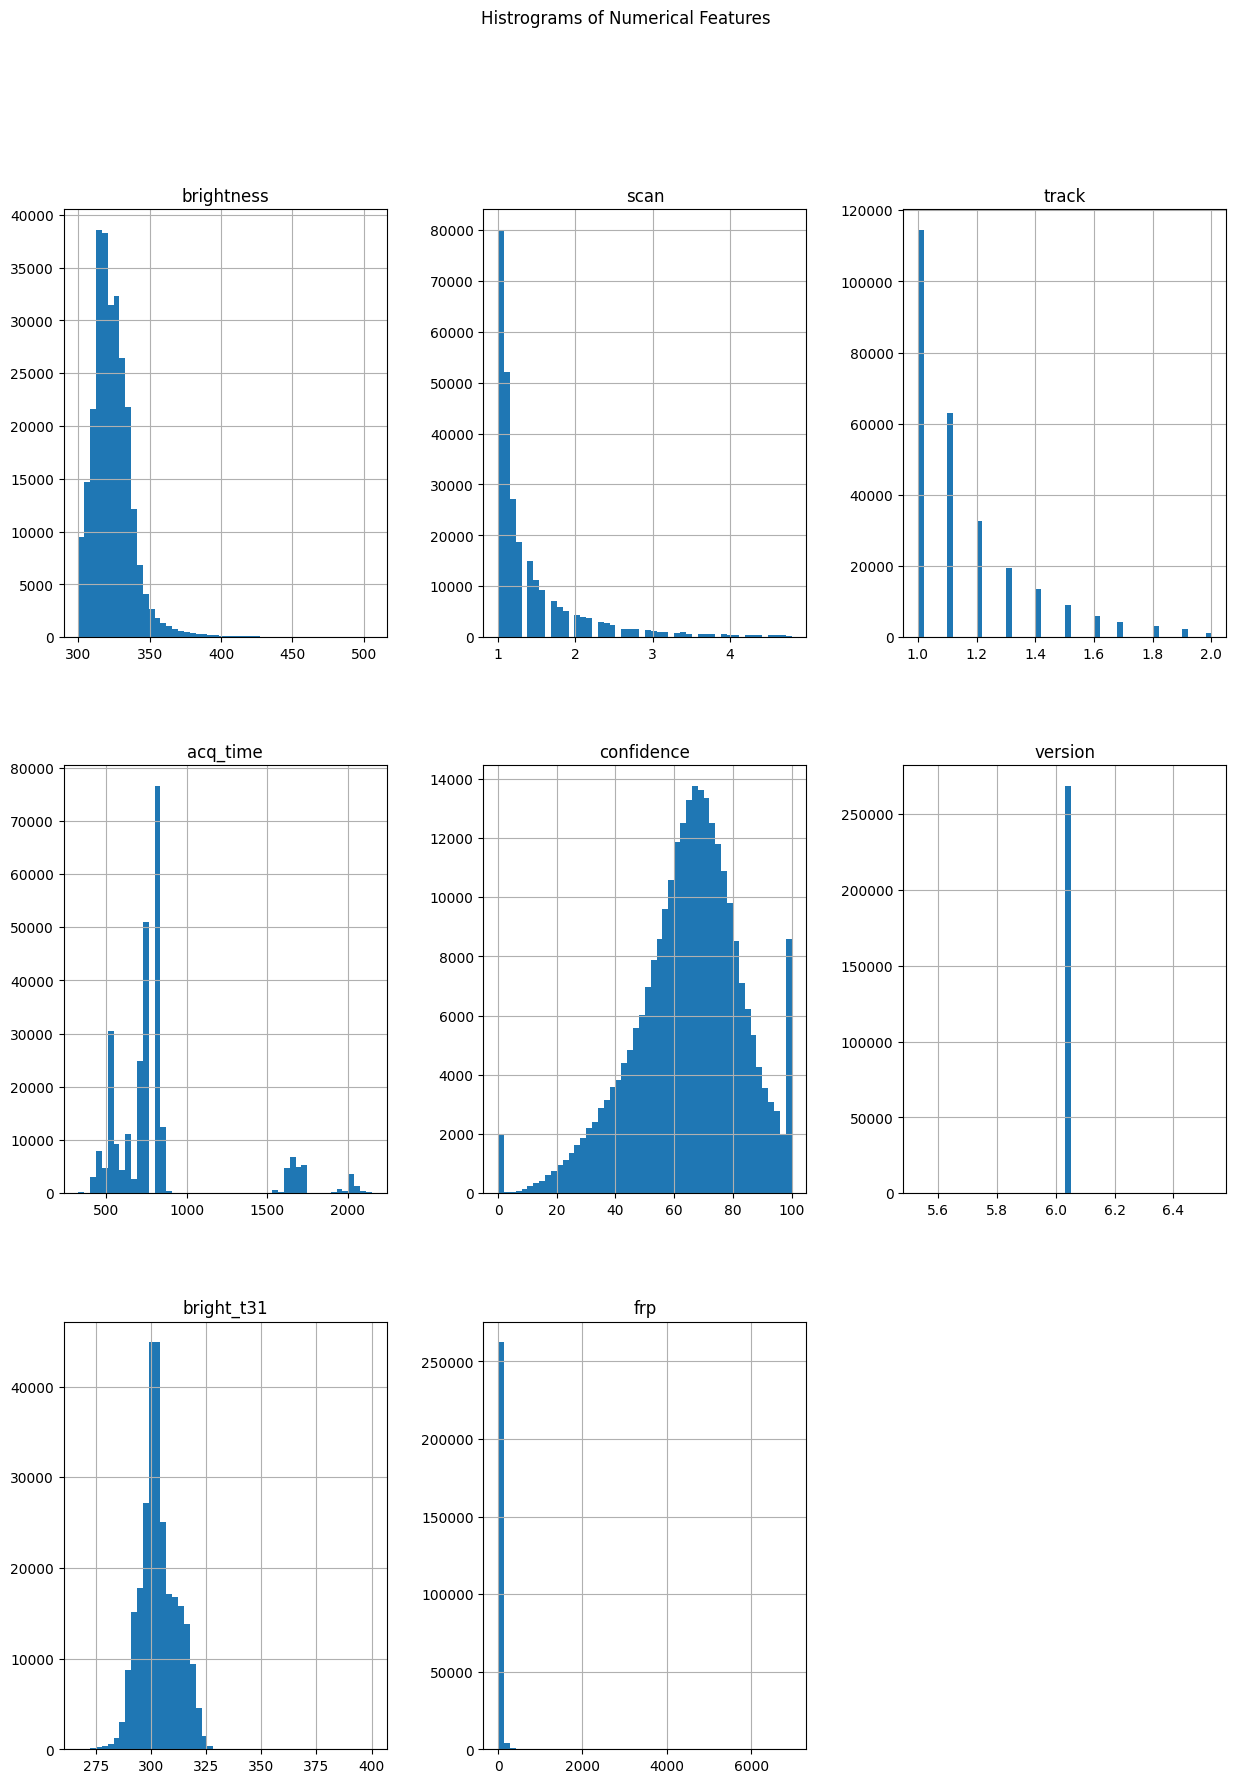

In [ ]:
numericals_cols=['brightness','scan','track','acq_time','confidence','version','bright_t31','frp']
df[numericals_cols].hist(bins=50,figsize=(15,20))
plt.suptitle('Histrograms of Numerical Features')
plt.show()

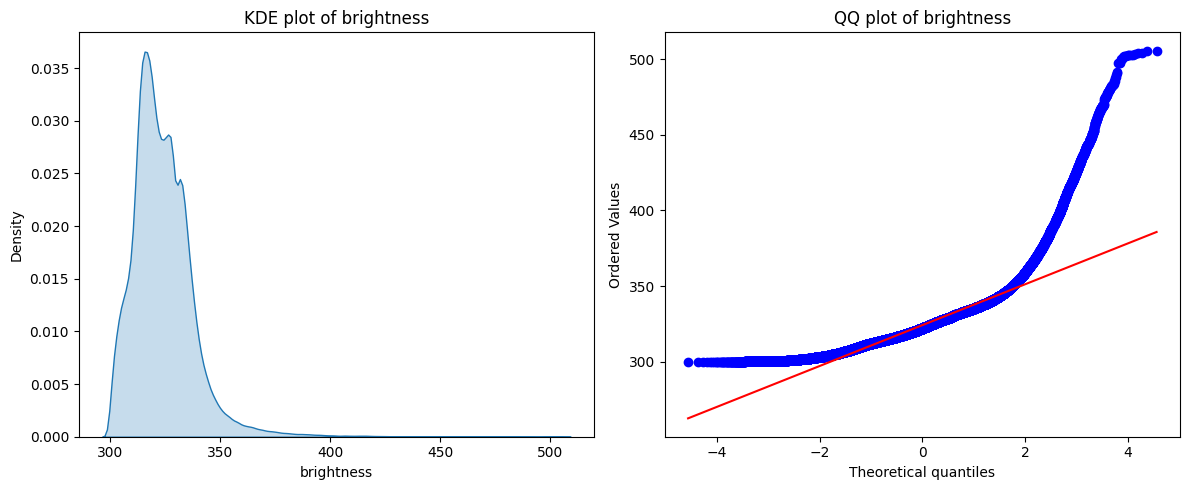

__________________________________________________


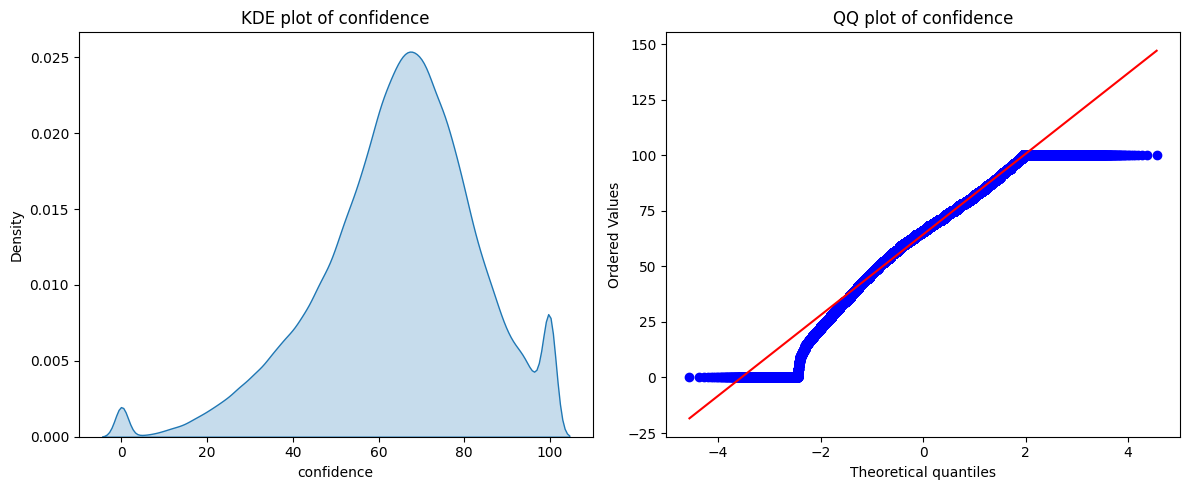

__________________________________________________


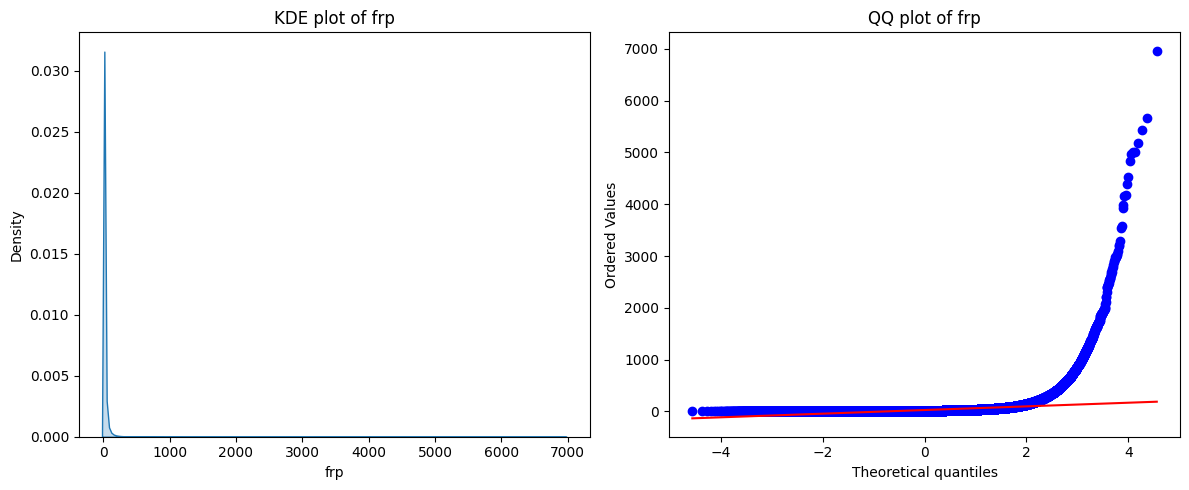

__________________________________________________


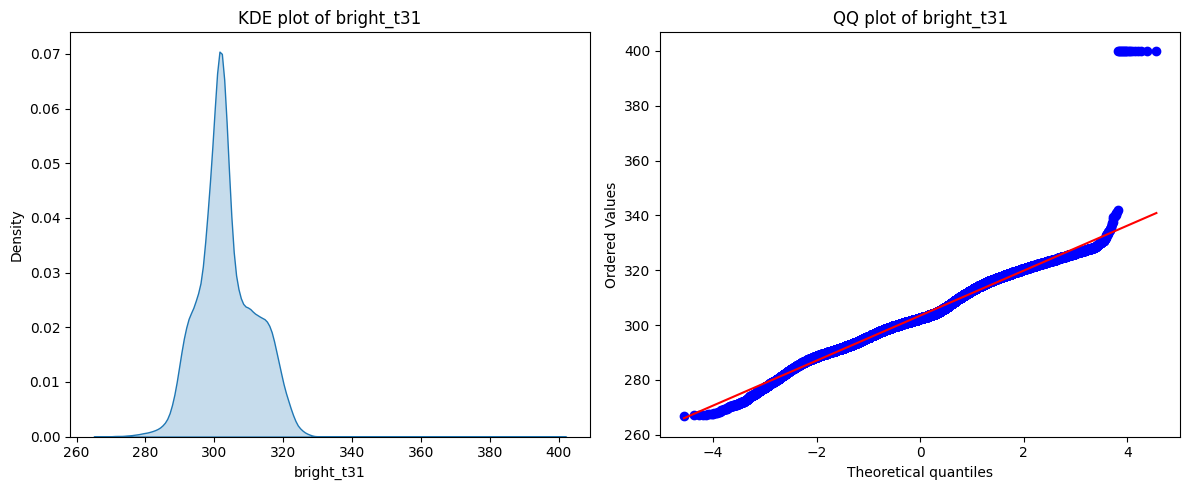

__________________________________________________


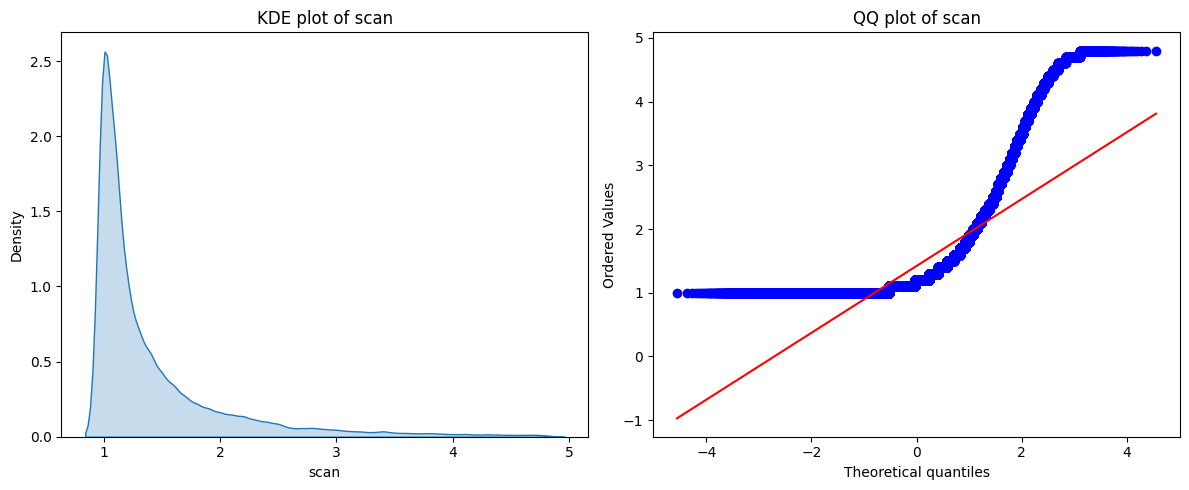

__________________________________________________


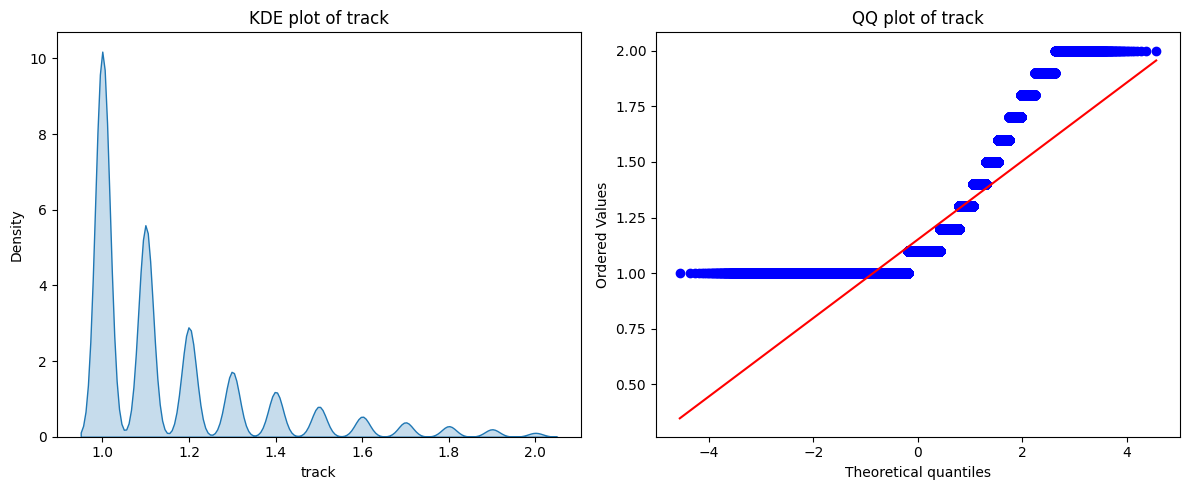

__________________________________________________


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
numerical_features=['brightness','confidence','frp','bright_t31','scan','track']
for feature in numerical_features:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.kdeplot(df[feature],fill=True)
  plt.title(f'KDE plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.subplot(1,2,2)
  stats.probplot(df[feature],dist='norm',plot=plt)
  plt.title(f'QQ plot of {feature}')
  plt.tight_layout()
  plt.show()
  print("_"*50)

In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour']=df['acq_time'].astype(str).str[:2].astype(int)

/tmp/ipython-input-4057970538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='month',palette='viridis')


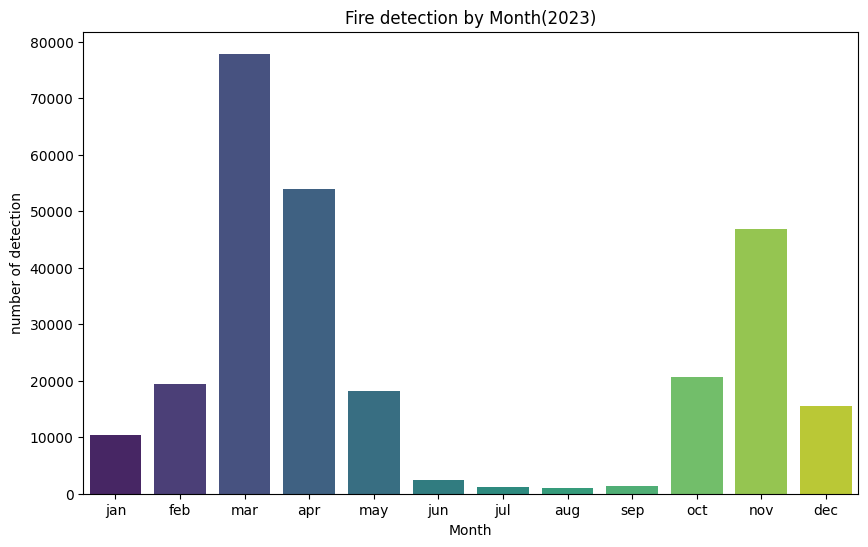

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='month',palette='viridis')
plt.title('Fire detection by Month(2023)')
plt.xlabel('Month')
plt.ylabel('number of detection')
plt.xticks(ticks=range(12),labels=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.show()

/tmp/ipython-input-3792801996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='day_of_week',palette='viridis')


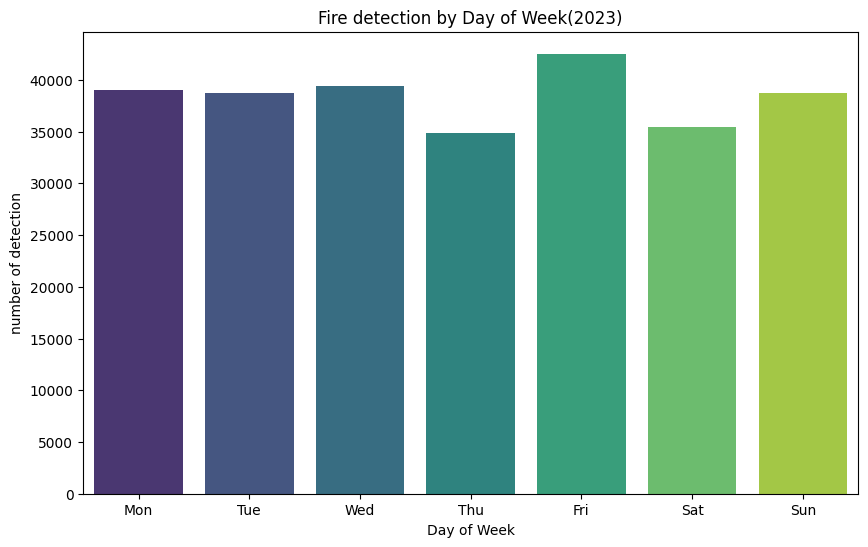

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='day_of_week',palette='viridis')
plt.title('Fire detection by Day of Week(2023)')
plt.xlabel('Day of Week')
plt.ylabel('number of detection')
plt.xticks(ticks=range(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

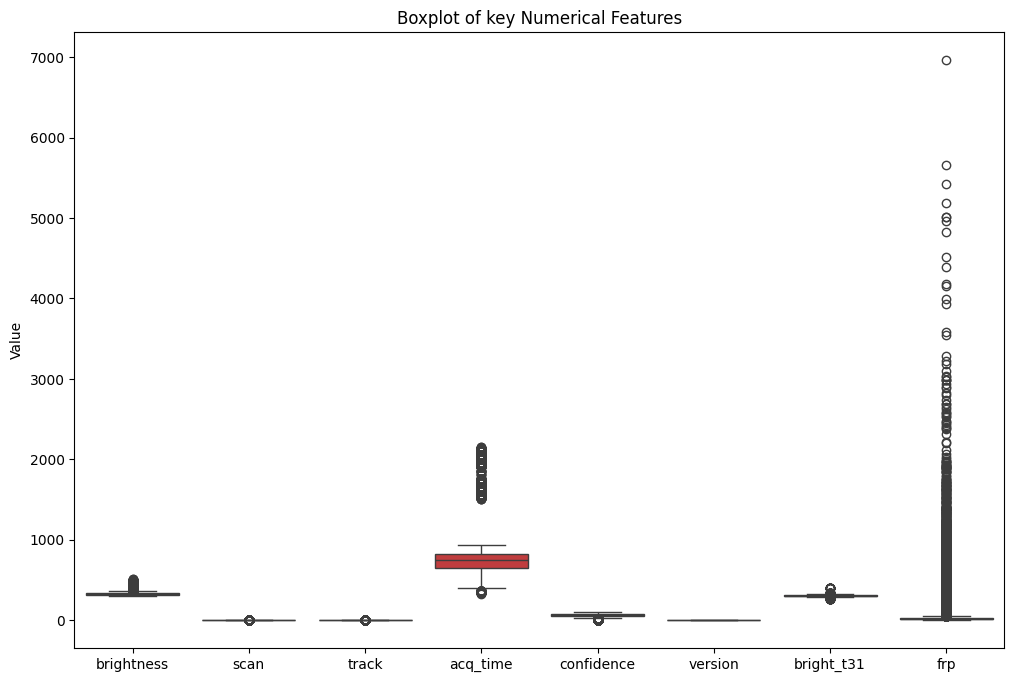

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numericals_cols])
plt.title('Boxplot of key Numerical Features')
plt.ylabel('Value')
plt.show()

In [ ]:
def remove_outliers_iqr(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df_cleaned=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)].copy()
  return df_cleaned
for col in numericals_cols:
  df=remove_outliers_iqr(df,col)
print("shape after removing outliers:",df.shape)

shape after removing outliers: (187860, 20)


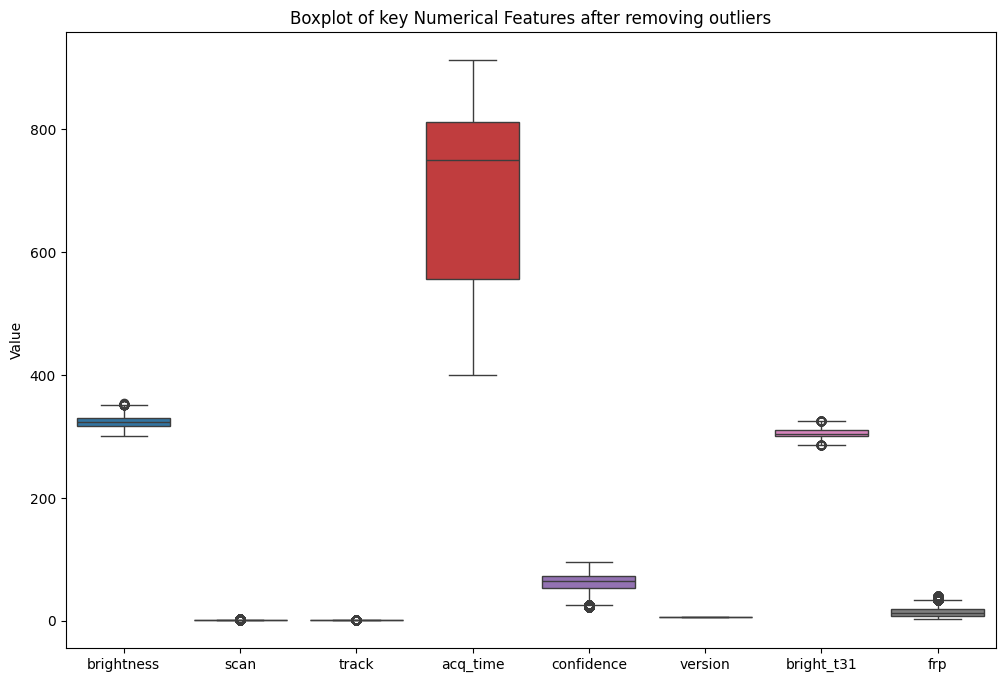

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numericals_cols])
plt.title('Boxplot of key Numerical Features after removing outliers')
plt.ylabel('Value')
plt.show()

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0,2020,1,2,1,53
5,25.2675,75.6958,305.9,1.0,1.0,2020-01-01,537,Terra,MODIS,57,6.03,289.3,6.2,D,0,2020,1,2,1,53
6,25.2661,75.7061,315.3,1.0,1.0,2020-01-01,537,Terra,MODIS,76,6.03,289.3,13.4,D,0,2020,1,2,1,53
9,18.3502,74.6306,320.6,1.0,1.0,2020-01-01,538,Terra,MODIS,64,6.03,301.2,11.3,D,0,2020,1,2,1,53
10,19.8314,75.2196,315.3,1.0,1.0,2020-01-01,538,Terra,MODIS,67,6.03,299.2,7.3,D,2,2020,1,2,1,53


In [ ]:
df.type.value_counts()

,count
type,
0,181340
2,6490
3,30


In [ ]:
categorical_cols=df.select_dtypes(include='object').columns


In [ ]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [ ]:
categorical_cols_to_encode=['satellite','instrument','daynight']
df_encoded=pd.get_dummies(df,columns=categorical_cols_to_encode,drop_first=True)

In [ ]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,58,6.03,288.8,6.4,0,2020,1,2,1,53,True
5,25.2675,75.6958,305.9,1.0,1.0,2020-01-01,537,57,6.03,289.3,6.2,0,2020,1,2,1,53,True
6,25.2661,75.7061,315.3,1.0,1.0,2020-01-01,537,76,6.03,289.3,13.4,0,2020,1,2,1,53,True
9,18.3502,74.6306,320.6,1.0,1.0,2020-01-01,538,64,6.03,301.2,11.3,0,2020,1,2,1,53,True
10,19.8314,75.2196,315.3,1.0,1.0,2020-01-01,538,67,6.03,299.2,7.3,2,2020,1,2,1,53,True


In [ ]:
df_encoded.type.value_counts()

,count
type,
0,181340
2,6490
3,30


In [ ]:
import folium
india_map=folium.Map(location=[22.351115,78.667743],zoom_start=5)
sample_df=df_encoded.sample(n=min(1000,len(df_encoded)),random_state=42)
for _, row in sample_df.iterrows():
  folium.CircleMarker(
      location=[row['latitude'],row['longitude']],
      radius=3,
      color='red',
      fill=True,
      fill_color=0.6,
      popup=f"FRP:{row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
  ).add_to(india_map)
display(india_map)

In [ ]:
scaler=StandardScaler()
numericals_cols_to_scale=['brightness','scan','track','confidence','bright_t31','frp']
df_encoded[numericals_cols_to_scale]=scaler.fit_transform(df_encoded[numericals_cols_to_scale])
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
3,28.9858,79.6159,-2.165198,-0.455427,-0.806917,2020-01-01,535,-0.334483,6.03,-2.267230,-1.028517,0,2020,1,2,1,53,True
5,25.2675,75.6958,-1.963474,-0.806134,-0.806917,2020-01-01,537,-0.404800,6.03,-2.198135,-1.053908,0,2020,1,2,1,53,True
6,25.2661,75.7061,-0.910024,-0.806134,-0.806917,2020-01-01,537,0.931232,6.03,-2.198135,-0.139841,0,2020,1,2,1,53,True
9,18.3502,74.6306,-0.316057,-0.806134,-0.806917,2020-01-01,538,0.087422,6.03,-0.553667,-0.406444,0,2020,1,2,1,53,True
10,19.8314,75.2196,-0.910024,-0.806134,-0.806917,2020-01-01,538,0.298375,6.03,-0.830048,-0.914259,2,2020,1,2,1,53,True


In [ ]:
df_encoded.info

<bound method DataFrame.info of         latitude  longitude  brightness      scan     track   acq_date  \
3        28.9858    79.6159   -2.165198 -0.455427 -0.806917 2020-01-01   
5        25.2675    75.6958   -1.963474 -0.806134 -0.806917 2020-01-01   
6        25.2661    75.7061   -0.910024 -0.806134 -0.806917 2020-01-01   
9        18.3502    74.6306   -0.316057 -0.806134 -0.806917 2020-01-01   
10       19.8314    75.2196   -0.910024 -0.806134 -0.806917 2020-01-01   
...          ...        ...         ...       ...       ...        ...   
268793   28.6277    80.3003   -1.649680  0.947403  0.944547 2022-12-31   
268794   28.6250    80.2849   -2.097957  0.947403  0.944547 2022-12-31   
268795   27.1963    81.4317   -1.929853  0.596695  0.944547 2022-12-31   
268797   28.6291    80.2949   -1.358300  0.947403  0.944547 2022-12-31   
268798   29.1479    79.1117   -2.512613  1.999525  1.820279 2022-12-31   

        acq_time  confidence  version  bright_t31       frp  type  year  \
3            535   -0.334483     6.03   -2.267230 -1.028517     0  2020   
5            537   -0.404800     6.03   -2.198135 -1.053908     0  2020   
6            537    0.931232     6.03   -2.198135 -0.139841     0  2020   
9            538    0.087422     6.03   -0.553667 -0.406444     0  2020   
10           538    0.298375     6.03   -0.830048 -0.914259     2  2020   
...          ...         ...      ...         ...       ...   ...   ...   
268793       744    0.228057     6.03   -1.728287 -0.241404     0  2022   
268794       744   -1.951784     6.03   -1.783563 -0.800001     0  2022   
268795       744   -0.123530     6.03   -1.534820 -0.952345     0  2022   
268797       744    0.579644     6.03   -1.769744  0.317192     0  2022   
268798       744   -1.318927     6.03   -2.018487 -0.787305     0  2022   

        month  day_of_week  day_of_year  hour  satellite_Terra  
3           1            2            1    53             True  
5           1            2            1    53             True  
6           1            2            1    53             True  
9           1            2            1    53             True  
10          1            2            1    53             True  
...       ...          ...          ...   ...              ...  
268793     12            5          365    74            False  
268794     12            5          365    74            False  
268795     12            5          365    74            False  
268797     12            5          365    74            False  
268798     12            5          365    74            False  

[187860 rows x 18 columns]>

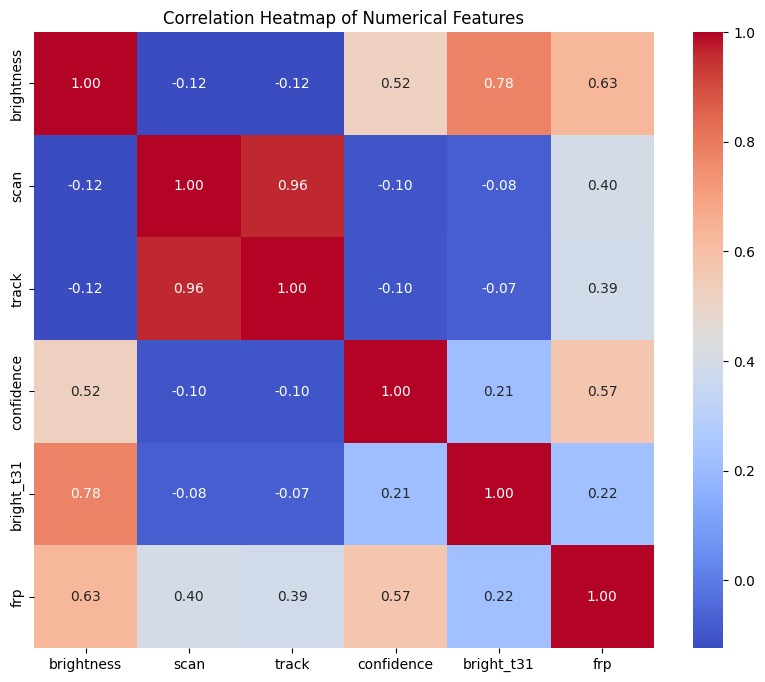

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix=df_encoded[['brightness','scan','track','confidence','bright_t31','frp']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
3,28.9858,79.6159,-2.165198,-0.455427,-0.806917,2020-01-01,535,-0.334483,6.03,-2.267230,-1.028517,0,2020,1,2,1,53,True
5,25.2675,75.6958,-1.963474,-0.806134,-0.806917,2020-01-01,537,-0.404800,6.03,-2.198135,-1.053908,0,2020,1,2,1,53,True
6,25.2661,75.7061,-0.910024,-0.806134,-0.806917,2020-01-01,537,0.931232,6.03,-2.198135,-0.139841,0,2020,1,2,1,53,True
9,18.3502,74.6306,-0.316057,-0.806134,-0.806917,2020-01-01,538,0.087422,6.03,-0.553667,-0.406444,0,2020,1,2,1,53,True
10,19.8314,75.2196,-0.910024,-0.806134,-0.806917,2020-01-01,538,0.298375,6.03,-0.830048,-0.914259,2,2020,1,2,1,53,True


In [ ]:
df_encoded.type.value_counts()

,count
type,
0,181340
2,6490
3,30


In [ ]:
features=['brightness','scan','track','confidence','bright_t31','frp']
target='type'
X=df_encoded[features]
Y=df_encoded[target]

In [ ]:
X

,brightness,scan,track,confidence,bright_t31,frp
3,-2.165198,-0.455427,-0.806917,-0.334483,-2.267230,-1.028517
5,-1.963474,-0.806134,-0.806917,-0.404800,-2.198135,-1.053908
6,-0.910024,-0.806134,-0.806917,0.931232,-2.198135,-0.139841
9,-0.316057,-0.806134,-0.806917,0.087422,-0.553667,-0.406444
10,-0.910024,-0.806134,-0.806917,0.298375,-0.830048,-0.914259
...,...,...,...,...,...,...
268793,-1.649680,0.947403,0.944547,0.228057,-1.728287,-0.241404
268794,-2.097957,0.947403,0.944547,-1.951784,-1.783563,-0.800001
268795,-1.929853,0.596695,0.944547,-0.123530,-1.534820,-0.952345
268797,-1.358300,0.947403,0.944547,0.579644,-1.769744,0.317192


In [ ]:
Y

,type
3,0
5,0
6,0
9,0
10,2
...,...
268793,0
268794,0
268795,0
268797,0


In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)
X_resampled,Y_resampled=smote.fit_resample(X,Y)
print("Distribution of target variable after SMOTE:")
print(Y_resampled.value_counts())

Distribution of target variable after SMOTE:
type
0    181340
2    181340
3    181340
Name: count, dtype: int64


In [ ]:
#split the dataset into test and train
X_train,X_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=0.25,random_state=42,stratify=Y_resampled)

In [ ]:
print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (408015, 6)
shape of X_test: (136005, 6)
shape of y_train: (408015,)
shape of y_test: (136005,)


In [ ]:
#import logistic regression  to train Sk learn
loreg=LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred=loreg.predict(X_test)
score=accuracy_score(y_test,loreg_pred)
cr=classification_report(y_test,loreg_pred)
print("Logistic Regression")
print("Accuracy scorevalue:{:.4f}",format(score))
print(cr)



Logistic Regression
Accuracy scorevalue:{:.4f} 0.5790228300430131
              precision    recall  f1-score   support

           0       0.63      0.50      0.56     45335
           2       0.48      0.50      0.49     45335
           3       0.64      0.73      0.68     45335

    accuracy                           0.58    136005
   macro avg       0.58      0.58      0.58    136005
weighted avg       0.58      0.58      0.58    136005



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
score=accuracy_score(y_test,dtc_pred)
cr=classification_report(y_test,dtc_pred)
print("Decision Tree ")
print("Accuracy scorevalue:{:.4f}",format(score))
print(cr)

Decision Tree 
Accuracy scorevalue:{:.4f} 0.9486930627550457
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     45335
           2       0.92      0.93      0.92     45335
           3       1.00      1.00      1.00     45335

    accuracy                           0.95    136005
   macro avg       0.95      0.95      0.95    136005
weighted avg       0.95      0.95      0.95    136005



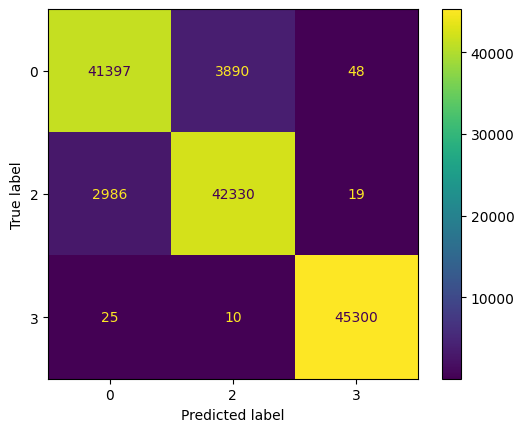

In [ ]:
dt_cm=ConfusionMatrixDisplay.from_estimator(dtc,X_test,y_test)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
score=accuracy_score(y_test,rfc_pred)
cr=classification_report(y_test,rfc_pred)
print("Random Forest")
print("Accuracy scorevalue:{:.4f}",format(score))
print(cr)

Random Forest
Accuracy scorevalue:{:.4f} 0.977464063821183
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     45335
           2       0.96      0.97      0.97     45335
           3       1.00      1.00      1.00     45335

    accuracy                           0.98    136005
   macro avg       0.98      0.98      0.98    136005
weighted avg       0.98      0.98      0.98    136005



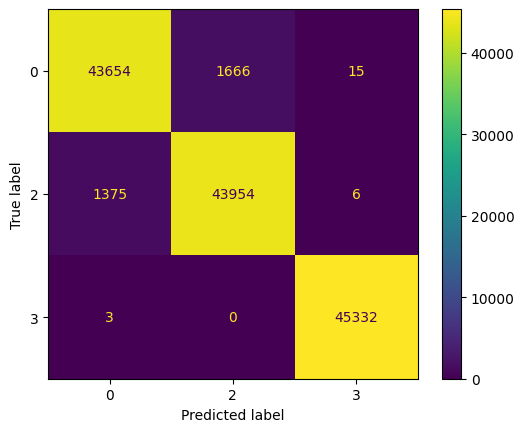

In [ ]:
rf_cm=ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [ ]:
#kneighbourclassifier to train
kmnc=KNeighborsClassifier()
kmnc.fit(X_train,y_train)
kmnc_pred=kmnc.predict(X_test)
score=accuracy_score(y_test,kmnc_pred)
cr=classification_report(y_test,kmnc_pred)
print("KNeighbour Classifier")
print("Accuracy scorevalue:{:.4f}",format(score))
print(cr)

KNeighbour Classifier
Accuracy scorevalue:{:.4f} 0.9329877578030219
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     45335
           2       0.84      0.98      0.91     45335
           3       1.00      1.00      1.00     45335

    accuracy                           0.93    136005
   macro avg       0.94      0.93      0.93    136005
weighted avg       0.94      0.93      0.93    136005



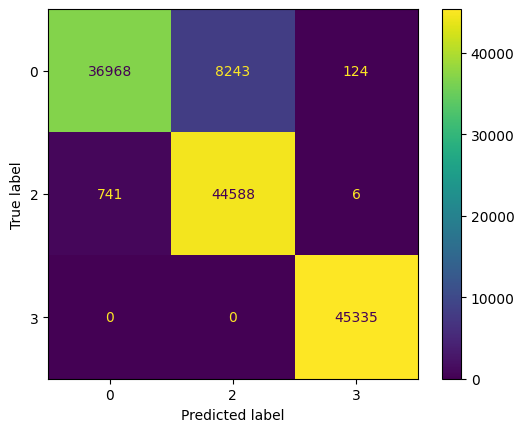

In [ ]:
kmn_cm=ConfusionMatrixDisplay.from_estimator(kmnc,X_test,y_test)

In [ ]:
#collect the accuracy of each model
model_accuracies={
    'Logistic Regression':accuracy_score(y_test,loreg_pred),
    'Decision Tree':accuracy_score(y_test,dtc_pred),
    'Random Forest':accuracy_score(y_test,rfc_pred),
    'KNeighbour Classifier':accuracy_score(y_test,kmnc_pred)
}
#finding the best model
best_model_name=max(model_accuracies,key=model_accuracies.get)
best_model_accuracy=model_accuracies[best_model_name]
print("Model Accuracies:")
for model_name,accuracy in model_accuracies.items():
  print(f"{model_name}:{accuracy:.4f}")
print(f"\nBesth model: (best_model_name) withaccuracy:{best_model_accuracy:.4f}")

Model Accuracies:
Logistic Regression:0.5790
Decision Tree:0.9487
Random Forest:0.9775
KNeighbour Classifier:0.9330

Besth model: (best_model_name) withaccuracy:0.9775


In [ ]:
import joblib
best_model=rfc
joblib.dump(best_model,'best_fire_detection_model.pkl')
joblib.dump(scaler,'scaler.pkl')
print("best model and Scaler saved sucessfully.")


best model and Scaler saved sucessfully.
